In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_score(df, x, y):
    xmap = {"n_clusters": "Number of clusters", "eps": "Epsilon", "min_samples": "Minimum number of samples"}
    df_mean = df.dropna()[[x, y]].groupby(x).mean()
    if y == "silhouette":
        t = "Silhouette Score"
        optimal_x = df_mean.idxmax().values[0]
    elif y == "davies_bouldin":
        t = "Davies Bouldin Score"
        optimal_x = df_mean.idxmin().values[0]
    elif y == "calinski":
        t = "Calinski Harabasz Score"
        optimal_x = df_mean.idxmax().values[0]

    # plt.plot(df[x], df[y])
    plt.figure()
    sns.lineplot(df, x=x, y=y)
    plt.ylabel(t)
    plt.xlabel(xmap[x])
    plt.axvline(optimal_x, color="orange")
    plt.tight_layout()

In [3]:
def plot_all_scores(scores, x="n_clusters", algorithm="kmeans", output_path="output/", suffix=None, save=True):
    plot_score(scores, x, "silhouette")  # KMeans: k=10 (close to 1 = best)
    if save:
        plt.savefig(f"{output_path}{algorithm}/silhouette_{algorithm}_{x}{suffix}.png")
    plt.show()

    plot_score(scores, x, "davies_bouldin")  # KMeans: k=10 (closest to minimum (zero)
    if save:
        plt.savefig(f"{output_path}{algorithm}/davies_bouldin_{algorithm}_{x}{suffix}.png")
    plt.show()

    plot_score(scores, x, "calinski")  # KMeans: k= (max is best)
    if save:
        plt.savefig(f"{output_path}{algorithm}/calinski_harabasz_{algorithm}_{x}{suffix}.png")
    plt.show()

In [4]:
xmap = {"n_clusters": "Number of clusters", "eps": "Epsilon", "min_samples": "Minimum number of samples"}
c_blue = sns.color_palette("tab10")[0]
c_orange = sns.color_palette("tab10")[1]

def plot_score_matrix(df, x):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

    # plot lines
    l1 = sns.lineplot(df[(df["scores_on"] == "original")], x=x, y="calinski", ax=axs[0, 0], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l2 = sns.lineplot(df[(df["scores_on"] == "original")], x=x, y="davies_bouldin", ax=axs[0, 1], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l3 = sns.lineplot(df[(df["scores_on"] == "original")], x=x, y="silhouette", ax=axs[0, 2], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    
    l4 = sns.lineplot(df[(df["scores_on"] == "embedding")], x=x, y="calinski", ax=axs[1, 0], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l5 = sns.lineplot(df[(df["scores_on"] == "embedding")], x=x, y="davies_bouldin", ax=axs[1, 1], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    l6 = sns.lineplot(df[(df["scores_on"] == "embedding")], x=x, y="silhouette", ax=axs[1, 2], hue="clustering_on", hue_order={"original": c_blue, "embedding": c_orange})
    
    # define labels
    l1.set(xlabel=None, ylabel="Scores on original data", title="Calinski-Harabasz Score")
    l2.set(xlabel=None, ylabel=None, title="Davies-Bouldin Score")
    l3.set(xlabel=None, ylabel=None, title="Silhouette Score")
    l4.set(xlabel=None, ylabel="Scores on embedded data")
    l5.set(xlabel=None, ylabel=None)
    l6.set(xlabel=None, ylabel=None)
    fig.supxlabel(xmap[x])
    
    # define optimal picks 
    ch_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_oe = df[(df["scores_on"] == "original") & (df["clustering_on"] == "embedding")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_eo = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "original")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    
    db_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_oe = df[(df["scores_on"] == "original") & (df["clustering_on"] == "embedding")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_eo = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "original")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    
    s_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_oe = df[(df["scores_on"] == "original") & (df["clustering_on"] == "embedding")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_eo = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "original")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    
    # plot optimal picks
    axs[0, 0].axvline(ch_oo, color=c_blue)
    axs[0, 0].axvline(ch_oe, color=c_orange)
    axs[1, 0].axvline(ch_eo, color=c_blue)
    axs[1, 0].axvline(ch_ee, color=c_orange)
    
    axs[0, 1].axvline(db_oo, color=c_blue)
    axs[0, 1].axvline(db_oe, color=c_orange)
    axs[1, 1].axvline(db_eo, color=c_blue)
    axs[1, 1].axvline(db_ee, color=c_orange)
    
    axs[0, 2].axvline(s_oo, color=c_blue)
    axs[0, 2].axvline(s_oe, color=c_orange)
    axs[1, 2].axvline(s_eo, color=c_blue)
    axs[1, 2].axvline(s_ee, color=c_orange)
    
    plt.tight_layout()

In [5]:
def plot_small_score_matrix(df, x):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
    
    # plot lines
    l1 = sns.lineplot(df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")], x=x, y="calinski", ax=axs[0, 0], c=c_blue)
    l2 = sns.lineplot(df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")], x=x, y="davies_bouldin", ax=axs[0, 1], c=c_blue)
    l3 = sns.lineplot(df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")], x=x, y="silhouette", ax=axs[0, 2], c=c_blue)
    
    l4 = sns.lineplot(df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")], x=x, y="calinski", ax=axs[1, 0], c=c_orange)
    l5 = sns.lineplot(df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")], x=x, y="davies_bouldin", ax=axs[1, 1], c=c_orange)
    l6 = sns.lineplot(df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")], x=x, y="silhouette", ax=axs[1, 2], c=c_orange)
    
    # define labels
    l1.set(xlabel=None, ylabel="Clustering on original data", title="Calinski-Harabasz Score")
    l2.set(xlabel=None, ylabel=None, title="Davies-Bouldin Score")
    l3.set(xlabel=None, ylabel=None, title="Silhouette Score")
    l4.set(xlabel=None, ylabel="Clustering on embedded data")
    l5.set(xlabel=None, ylabel=None)
    l6.set(xlabel=None, ylabel=None)
    fig.supxlabel(xmap[x])

    # define optimal picks 
    ch_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    ch_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "calinski"]].groupby([x]).mean().idxmax().values[0]
    
    db_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    db_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "davies_bouldin"]].groupby([x]).mean().idxmin().values[0]
    
    s_oo = df[(df["scores_on"] == "original") & (df["clustering_on"] == "original")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    s_ee = df[(df["scores_on"] == "embedding") & (df["clustering_on"] == "embedding")].dropna()[[x, "silhouette"]].groupby([x]).mean().idxmax().values[0]
    
    # plot optimal picks
    axs[0, 0].axvline(ch_oo, color=c_blue)
    axs[1, 0].axvline(ch_ee, color=c_orange)
    
    axs[0, 1].axvline(db_oo, color=c_blue)
    axs[1, 1].axvline(db_ee, color=c_orange)
    
    axs[0, 2].axvline(s_oo, color=c_blue)
    axs[1, 2].axvline(s_ee, color=c_orange)
    
    plt.tight_layout()

In [7]:
# load data
df_kmeans = pd.read_csv(f"output/kmeans_scores.csv")
df_ward = pd.read_csv(f"output/ward_scores.csv")
df_dbscan = pd.read_csv(f"output/dbscan_scores.csv")

In [6]:
# plot_all_scores(df[(df["clustering_on"] == "embedding") & (df["scores_on"] == "embedding")], 
#                 x="n_clusters", algorithm="kmeans", suffix=None)

## KMeans

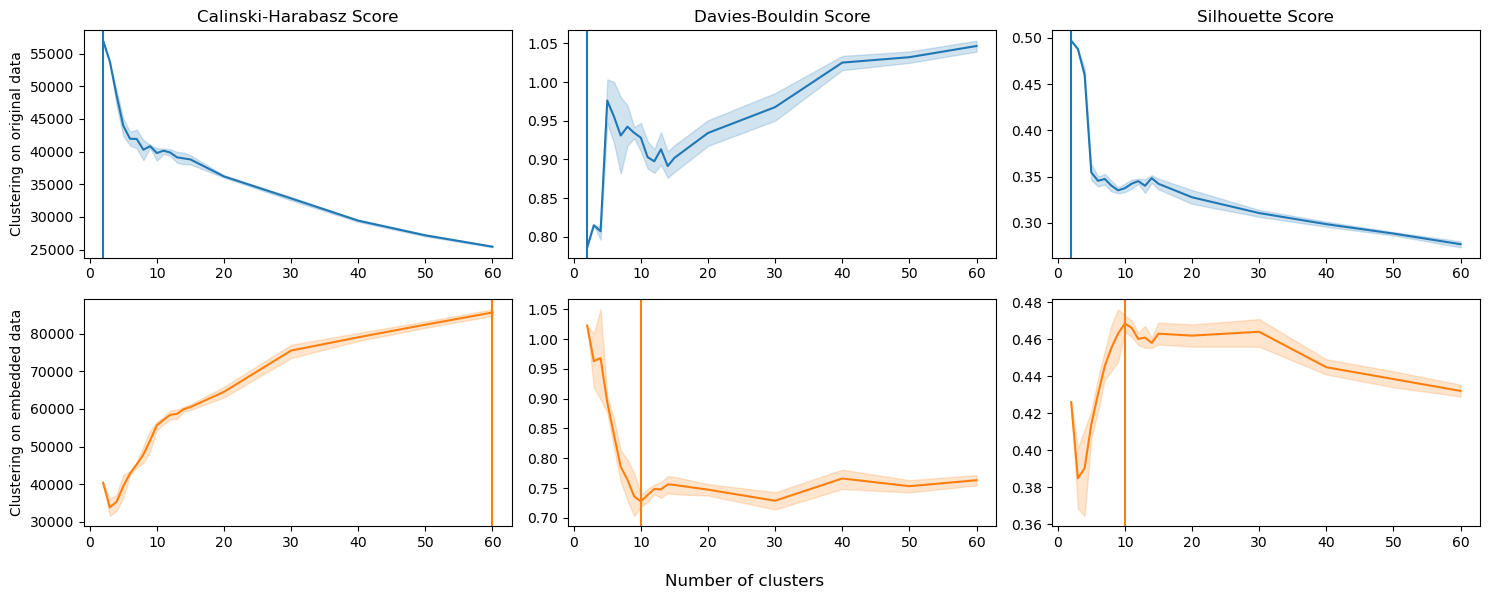

In [8]:
plot_small_score_matrix(df_kmeans, x="n_clusters")
plt.savefig("output/kmeans/small_score_matrix.png")
plt.show()

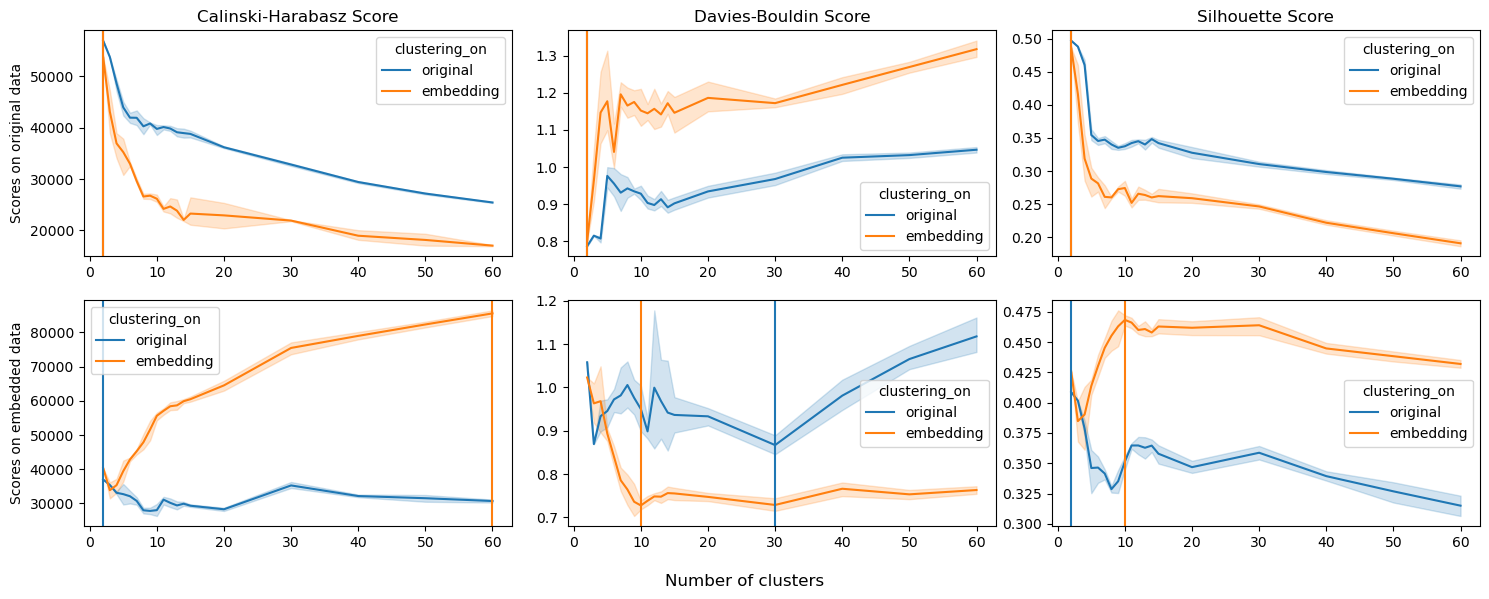

In [9]:
plot_score_matrix(df_kmeans, x="n_clusters")
plt.savefig("output/kmeans/score_matrix.png")
plt.show()

Scores on embedded data: Clustering on embedding better <br>
Scores on original data: Clustering on original data better

## Agglomerative Ward

In [10]:
df_ward = df_ward.drop("distance_threshold", axis=1)

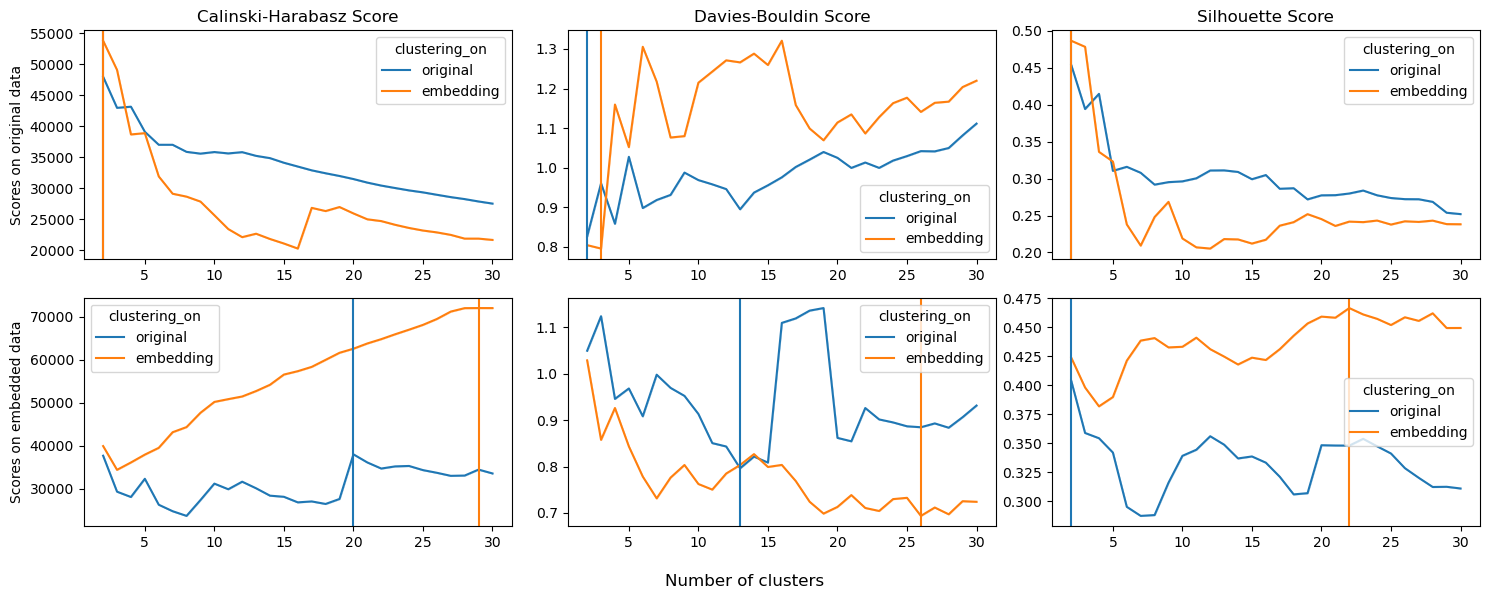

In [11]:
plot_score_matrix(df_ward, x="n_clusters")
plt.savefig("output/ward/score_matrix.png")
plt.show()

Variations are very small --> Errorbar is not visible on these scales. <br>
Scores on embedded data: Clustering on embedding better <br>
Scores on original data: Clustering on original data better    

## DBSCAN

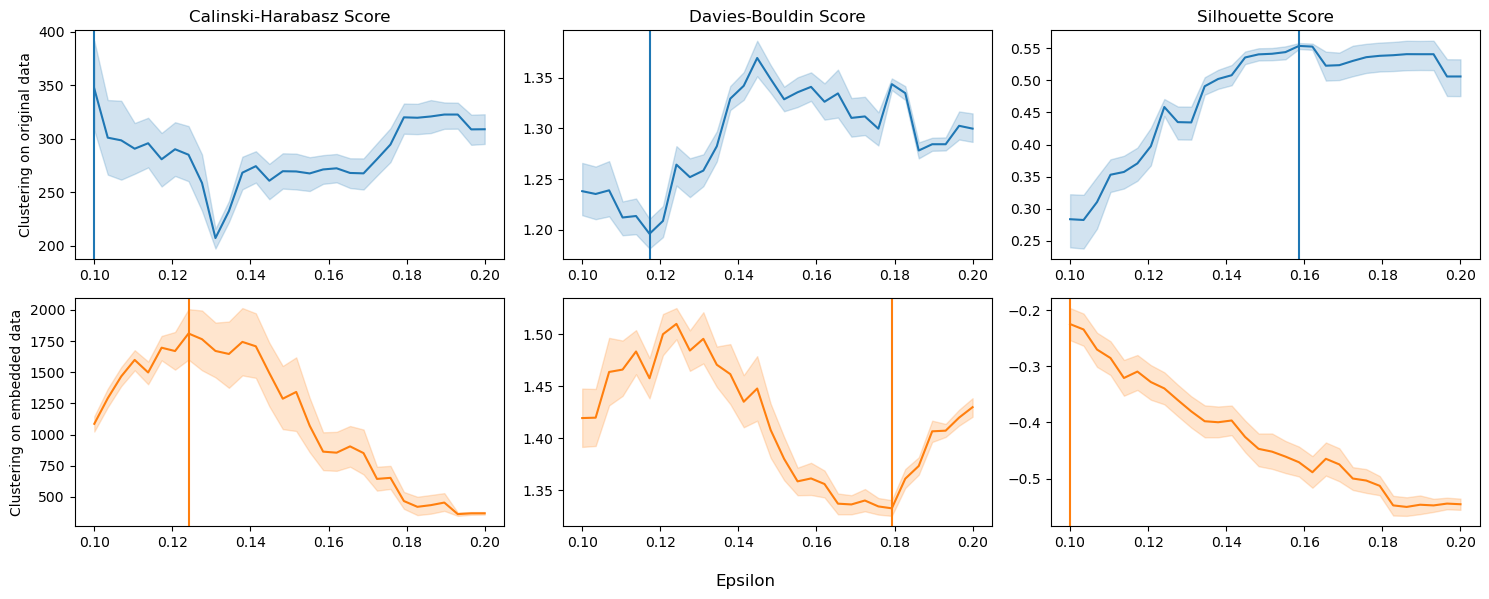

In [16]:
plot_small_score_matrix(df_dbscan, x="eps")
plt.savefig("output/dbscan/small_score_matrix_eps.png")
plt.show()

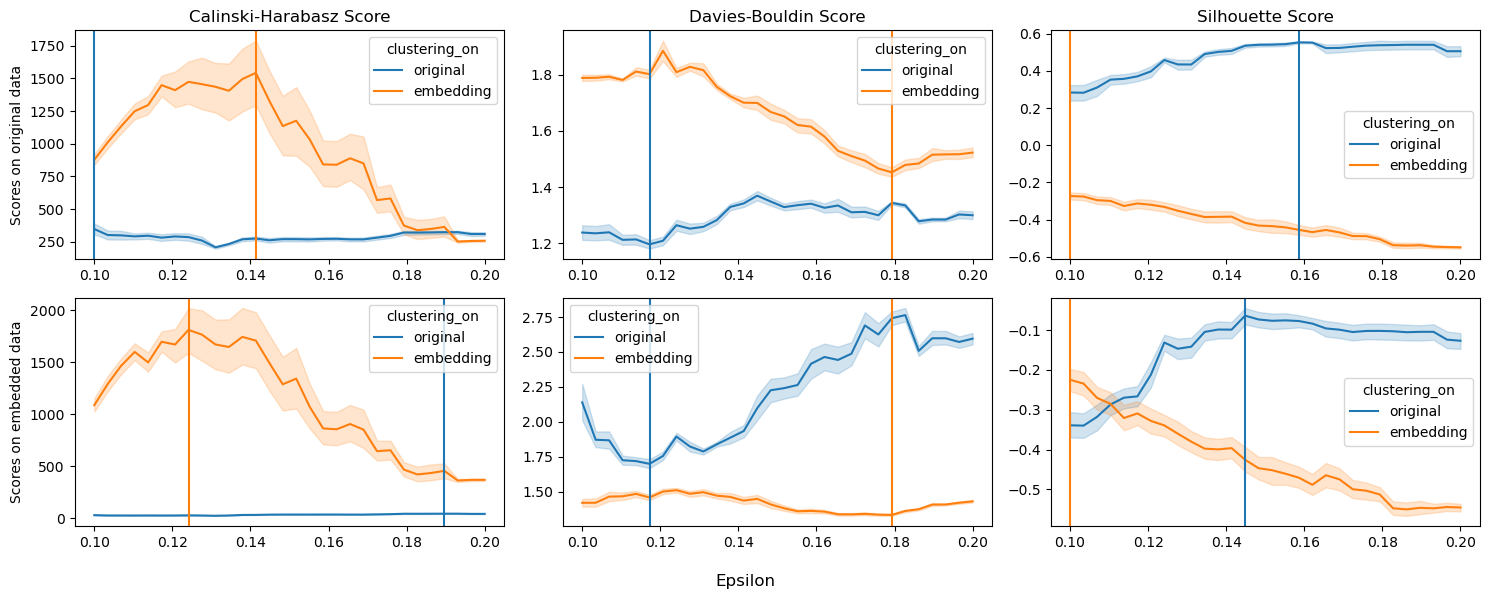

In [13]:
plot_score_matrix(df_dbscan, x="eps")
plt.savefig("output/dbscan/score_matrix_eps.png")
plt.show()

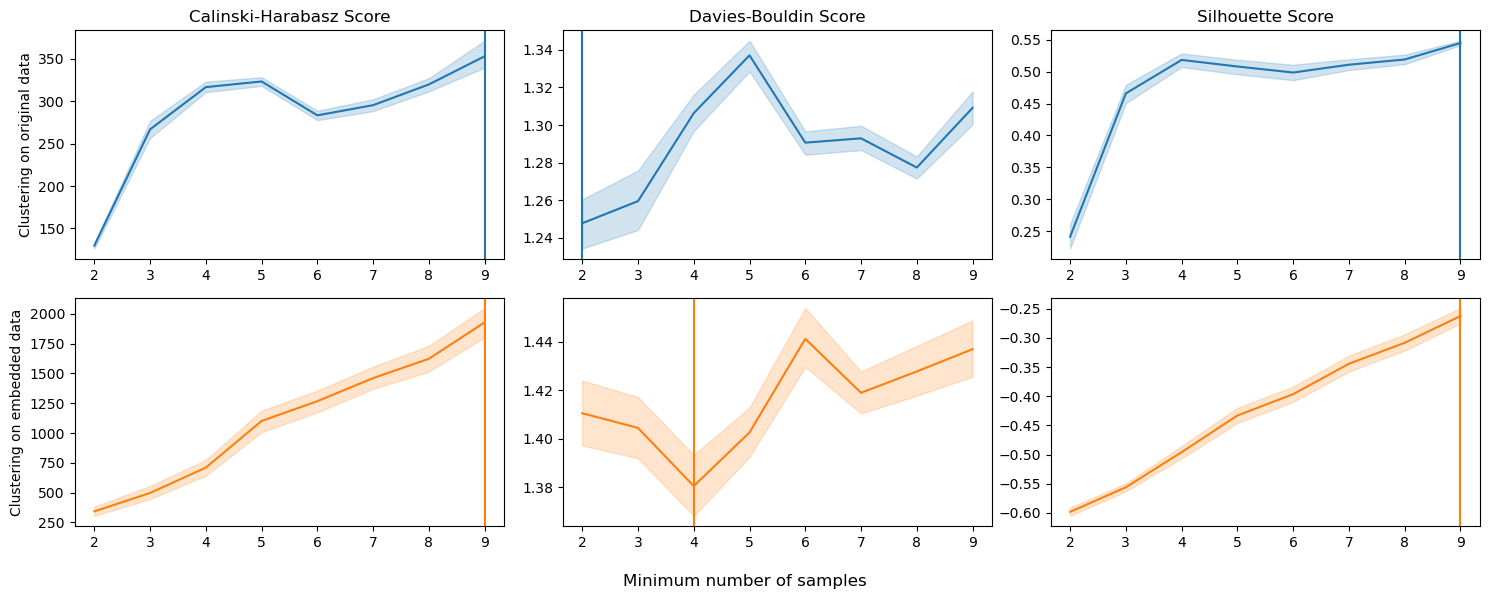

In [17]:
plot_small_score_matrix(df_dbscan, x="min_samples")
plt.savefig("output/dbscan/small_score_matrix_min_samples.png")
plt.show()

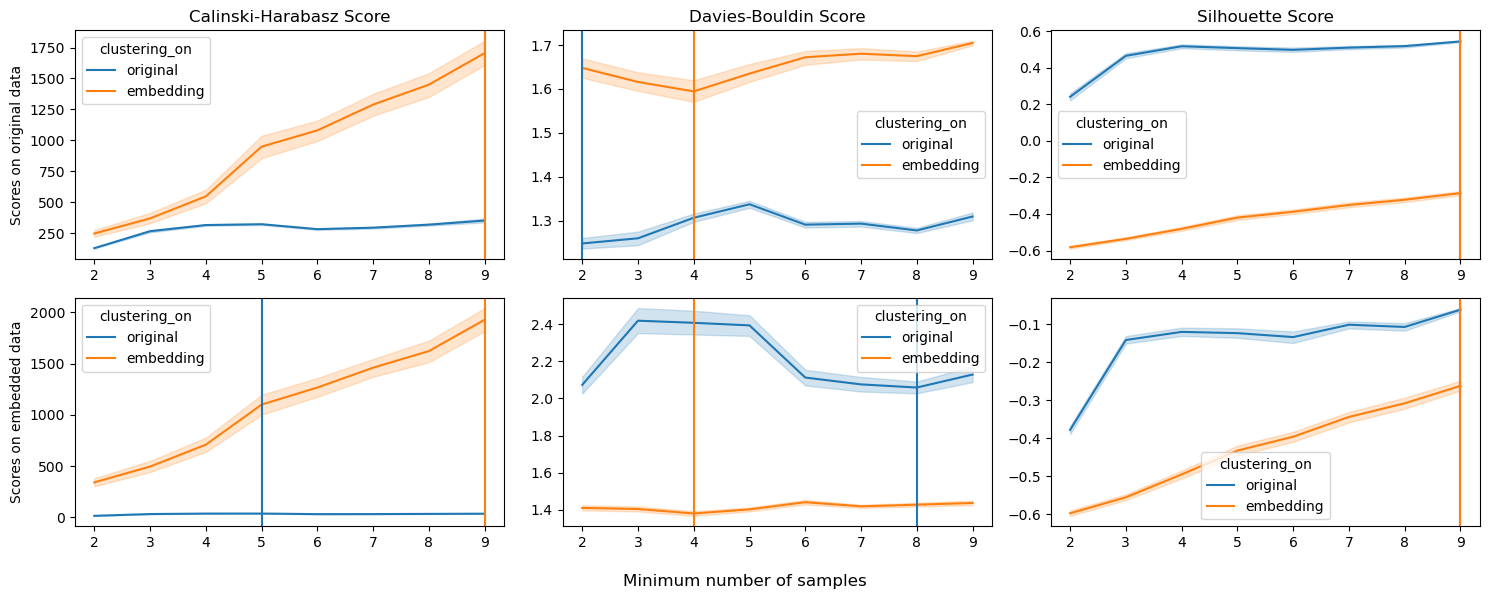

In [14]:
plot_score_matrix(df_dbscan, x="min_samples")
plt.savefig("output/dbscan/score_matrix_min_samples.png")
plt.show()

In [ ]:
# heatmap
